## Librerie

In [8]:
import numpy as np
import matplotlib.pyplot as plt

## Settings

In [9]:
ITERAZIONI = 200000
LEARNING_RATE = 0.27

## Funzioni che useremo

In [10]:
## Activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_p(x):
    return x * ( 1 - x )

## Dati

In [11]:
inputs = np.load("input_classificatori.npy")
mistery = np.load("mistery_classificatori.npy")

## Grafico

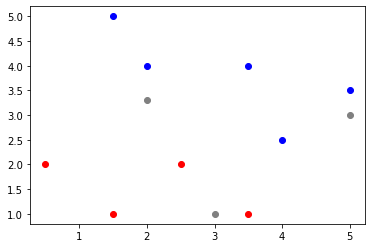

In [12]:
fig, ax = plt.subplots()
for i in inputs:
    ax.scatter(i[0], i[1], color = 'r' if i[2] == 0 else 'b')
for i in mistery:
    ax.scatter(i[0], i[1], color = 'gray')

## Pesi randomici

In [13]:
w = np.random.randn(1,3)

## Training

In [14]:
costi_lista = np.empty(0, dtype=float)
## Iteriamo per tutte le iterazioni
for i in range(ITERAZIONI):
    ## Prendo un valore casuale dal nostro dataset
    val_c = np.random.randint(len(inputs))
    ## Ricavo i rispettivi input
    input_eff = inputs[val_c, :-1]
    ## Prendo l'output
    target = inputs[val_c, -1]
    
    ## Calcolo la somma del
    nn = np.multiply( w[0, :-1], input_eff ).sum() + w[0, -1]
    ## Utilizzo l'activation function
    pred = sigmoid(nn)
    
    ## Ricavo il nostro costo
    cost = np.square(pred - target)
    
    ### Derivate
    ## Derivata del costo
    dcost = 2 * ( pred - target )
    ## Derivata del nostro sigmoid
    dpred = sigmoid_p(pred)
    ## Derivata dei vari pesi + bias
    d_inputs = np.append(input_eff, 1)
    
    ## Prendo la derivata finale
    dcosts = dcost * dpred * d_inputs
    w = w - LEARNING_RATE * dcosts
    
    if i % 1000 == 0:
        costi_lista = np.append(costi_lista, cost)
    
    

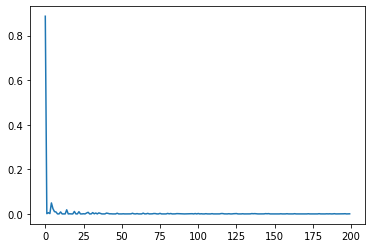

In [15]:
## Stampo i costi totali
plt.plot(costi_lista)
## Preparo per la visualizzazione
w0 = w[0,0]
w1 = w[0,1]
b0 = w[0,2]
def NN(lun, pel):
    return False if sigmoid(w0 * lun + w1 * pel + b0) <= 0.5 else True

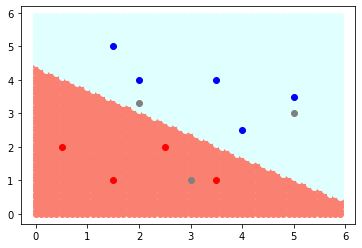

In [16]:
fig, ax = plt.subplots()
## Griglia
for i in range(60):
    for j in range(60):
        # ax.scatter(i , j , "lightcyan" if nn(i ,j ) else "salmon")
        ax.scatter(i / 10 , j / 10, color = "lightcyan" if NN(i/10,j/10) else "salmon" )
## Stampo gli inputs
for i in inputs:
    ax.scatter(i[0], i[1], color = 'r' if i[2] == 0 else 'b' )
## Stampo gli outputs
for i in mistery:
    ax.scatter(i[0], i[1], color = 'gray')